# ВКР. Анализ данных оригинальных бизнес-процессов
## Данный модуль направлен на анализ необходимости изменений в составе персонала, как запрашивает руководитель команды
Средняя занятость ресурсов по результатам эксперимента: руководитель - 0.992, разработчик - 0.976, стажеры - 0.769


Два стажера выполняют проекты Web, Report; руководитель - Portal, Database; разработчик - Infrastructure

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nIterations = 100

### Датасеты содержат данные о всех выполненных заданиях по каждому ресурсу за 100 итераций.
queue_time - время в очереди, wip_time - время в работе, prm_time - в вытеснении (пришла более приоритетная задача). Время указано в рабочих часах

In [3]:
managerDF = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/manager_tasks.xlsx")
developerDF = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/developer_tasks.xlsx")
internsDF = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/interns_tasks.xlsx")

In [4]:
labelsDict = {
    11:"Meetings",
    22:"SCSM_ServiceNonAdmin",
    23:"SCSM_ServiceAdmin",
    24:"SCSM_Report",
    25:"SCSM_Web",
    34:"JIRA_Report",
    35:"JIRA_Web",
    36:"JIRA_Infrastructure",
    37:"JIRA_Portal",
    38:"JIRA_Database",
    49:"Learning"
}

In [5]:
managerDF["source_task"] = managerDF["source_id"].map(labelsDict)
managerDF["staff"] = "manager"
developerDF["source_task"] = developerDF["source_id"].map(labelsDict)
developerDF["staff"] = "developer"
internsDF["source_task"] = internsDF["source_id"].map(labelsDict)
internsDF["staff"] = "interns"

In [6]:
managerDFformatted = managerDF[["source_task","queue_time","wip_time","prm_time","staff"]]
developerDFformatted = developerDF[["source_task","queue_time","wip_time","prm_time","staff"]]
internsDFformatted = internsDF[["source_task","queue_time","wip_time","prm_time","staff"]]

In [7]:
df_full = pd.concat([managerDFformatted,developerDFformatted,internsDFformatted], ignore_index = True)

In [8]:
df_full

,source_task,queue_time,wip_time,prm_time,staff
0,Meetings,0.000000,1.490695,0.0,manager
1,Meetings,0.000000,1.206877,0.0,manager
2,Meetings,0.000000,1.944654,0.0,manager
3,SCSM_ServiceAdmin,14.650000,0.991680,0.0,manager
4,SCSM_ServiceNonAdmin,15.650000,0.099396,0.0,manager
...,...,...,...,...,...
72146,SCSM_ServiceNonAdmin,0.450000,0.102317,0.0,interns
72147,SCSM_ServiceNonAdmin,0.550000,0.121916,0.0,interns
72148,SCSM_ServiceNonAdmin,0.516667,0.181062,0.0,interns
72149,SCSM_ServiceNonAdmin,0.666667,0.096688,0.0,interns


In [9]:
df_full.groupby(["source_task"]).mean()

,queue_time,wip_time,prm_time
source_task,,,
JIRA_Database,342.296970,203.893364,44.150547
JIRA_Infrastructure,205.310426,533.778515,3.701418
JIRA_Portal,409.944564,127.066765,36.063466
JIRA_Report,77.707804,62.242219,7.353868
JIRA_Web,134.480924,87.496020,6.410503
Meetings,0.000000,1.503391,0.000000
SCSM_Report,0.168280,2.981937,0.190015
SCSM_ServiceAdmin,1.180206,0.802703,0.066882
SCSM_ServiceNonAdmin,0.379005,0.173397,0.004096


Мелкие задачи из SCSM выполняются быстро, они дальше не рассматриваются

In [10]:
df_fullJira = df_full[df_full["source_task"].str.contains("JIRA")]
df_fullJira

,source_task,queue_time,wip_time,prm_time,staff
32,JIRA_Portal,24.750000,136.590347,50.833333,manager
74,JIRA_Database,216.333333,205.232939,67.866667,manager
119,JIRA_Database,0.000000,171.284570,43.200000,manager
156,JIRA_Database,182.283333,222.193907,54.000000,manager
191,JIRA_Database,257.350000,209.735215,51.116667,manager
...,...,...,...,...,...
72039,JIRA_Web,0.000000,138.766841,12.733333,interns
72048,JIRA_Web,0.000000,133.662309,11.383333,interns
72057,JIRA_Web,91.133333,87.165701,6.633333,interns
72060,JIRA_Web,14.216667,65.616892,3.300000,interns


<AxesSubplot:ylabel='source_task'>

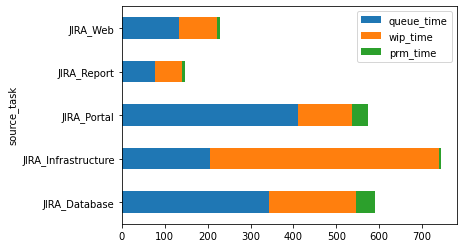

In [11]:
df_fullJira.groupby("source_task").mean().plot(kind = "barh", stacked = True, sort_columns = True)

Большие задержки на проектах Database, Portal (руководитель), Web, Report (стажеры, а после их увольнения - основной персонал)

<AxesSubplot:ylabel='source_task,staff'>

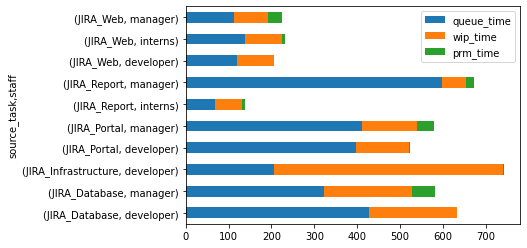

In [12]:
# Среднее время проектов по состояниям и исполнителям
df_fullJira.groupby(["source_task","staff"]).mean().plot(kind = "barh", stacked = True, sort_columns = True)

Проекты Report резко увеличивают время простоя после увольнения стажеров.
У руководителя вообще проекты очень много простаивают

In [13]:
#Среднее время проекта за итерацию по состояниям и исполнителям
df_full.groupby(["staff","source_task"]).sum()/nIterations

queue_time     wip_time    prm_time
staff     source_task                                               
developer JIRA_Database          312.479167   148.769418    0.881167
          JIRA_Infrastructure    482.479500  1254.379510    8.698333
          JIRA_Portal            218.182833    68.154666    0.812833
          JIRA_Web               210.583500   153.989323    1.871000
          SCSM_ServiceAdmin        0.121500     4.128918    0.000000
          SCSM_ServiceNonAdmin     3.819667     3.973732    0.000000
          SCSM_Web                 0.275667    17.126830    0.000000
interns   JIRA_Report            668.481500   607.414608   69.732667
          JIRA_Web              1648.070667  1052.556230   72.917333
          SCSM_Report              2.837833    43.933835    0.000000
          SCSM_ServiceNonAdmin   103.274167    51.826903    0.000000
          SCSM_Web                 1.314000    25.291748    0.000000
manager   JIRA_Database         1043.016833   658.648303  173.955000
          JIRA_Portal           2257.882333   699.328597  217.010500
          JIRA_Report            101.602833     9.405780    3.144167
          JIRA_Web                57.699000    40.272736   16.561333
          Meetings                 0.000000   381.861355    0.000000
          SCSM_Report              0.864333    21.668774    4.180333
          SCSM_ServiceAdmin       19.942000     9.517029    1.137000
          SCSM_ServiceNonAdmin    35.033000     9.223123    1.535833

<AxesSubplot:ylabel='staff,source_task'>

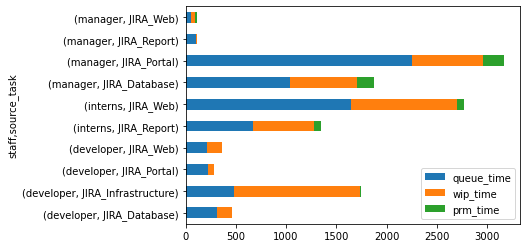

In [14]:
avgIteration = df_fullJira.groupby(["staff","source_task"]).sum()/nIterations
avgIteration.plot(kind = "barh", stacked = True, sort_columns = True)

In [38]:
# Количество выполненных задач в среднем за итерацию
df_full.groupby(["staff","source_task"]).count()/nIterations

queue_time  wip_time  prm_time
staff     source_task                                         
developer JIRA_Database               0.73      0.73      0.73
          JIRA_Infrastructure         2.35      2.35      2.35
          JIRA_Portal                 0.55      0.55      0.55
          JIRA_Web                    1.77      1.77      1.77
          SCSM_ServiceAdmin           5.10      5.10      5.10
          SCSM_ServiceNonAdmin       22.85     22.85     22.85
          SCSM_Web                    6.88      6.88      6.88
interns   JIRA_Report                 9.74      9.74      9.74
          JIRA_Web                   11.97     11.97     11.97
          SCSM_Report                14.72     14.72     14.72
          SCSM_ServiceNonAdmin      298.96    298.96    298.96
          SCSM_Web                   10.12     10.12     10.12
manager   JIRA_Database               3.23      3.23      3.23
          JIRA_Portal                 5.49      5.49      5.49
          JIRA_Report                 0.17      0.17      0.17
          JIRA_Web                    0.51      0.51      0.51
          Meetings                  254.00    254.00    254.00
          SCSM_Report                 7.28      7.28      7.28
          SCSM_ServiceAdmin          11.90     11.90     11.90
          SCSM_ServiceNonAdmin       53.19     53.19     53.19

In [16]:
df_fullJira.groupby(["source_task","staff"]).mean()

queue_time    wip_time   prm_time
source_task         staff                                       
JIRA_Database       developer  428.053653  203.793724   1.207078
                    manager    322.915428  203.915883  53.856037
JIRA_Infrastructure developer  205.310426  533.778515   3.701418
JIRA_Portal         developer  396.696061  123.917574   1.477879
                    manager    411.271828  127.382258  39.528324
JIRA_Report         interns     68.632598   62.362896   7.159411
                    manager    597.663725   55.328115  18.495098
JIRA_Web            developer  118.973729   86.999618   1.057062
                    interns    137.683431   87.932851   6.091674
                    manager    113.135294   78.966149  32.473203

In [17]:
df_fullJira.groupby(["source_task","staff"]).std()

queue_time    wip_time   prm_time
source_task         staff                                       
JIRA_Database       developer  287.174765   42.255121   3.308236
                    manager    190.879410   40.994346  15.341228
JIRA_Infrastructure developer  148.816540  151.969790   6.143381
JIRA_Portal         developer  300.647281   40.123717   2.500492
                    manager    240.049375   39.271181  15.882336
JIRA_Report         interns     61.176478   14.995856  14.398539
                    manager    244.889018   15.231753   9.875367
JIRA_Web            developer  236.552911   42.140006   2.000984
                    interns    167.872130   39.771423   8.237983
                    manager    242.809074   36.596747  12.946444

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


developer         AxesSubplot(0.1,0.559091;0.363636x0.340909)
interns      AxesSubplot(0.536364,0.559091;0.363636x0.340909)
manager               AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

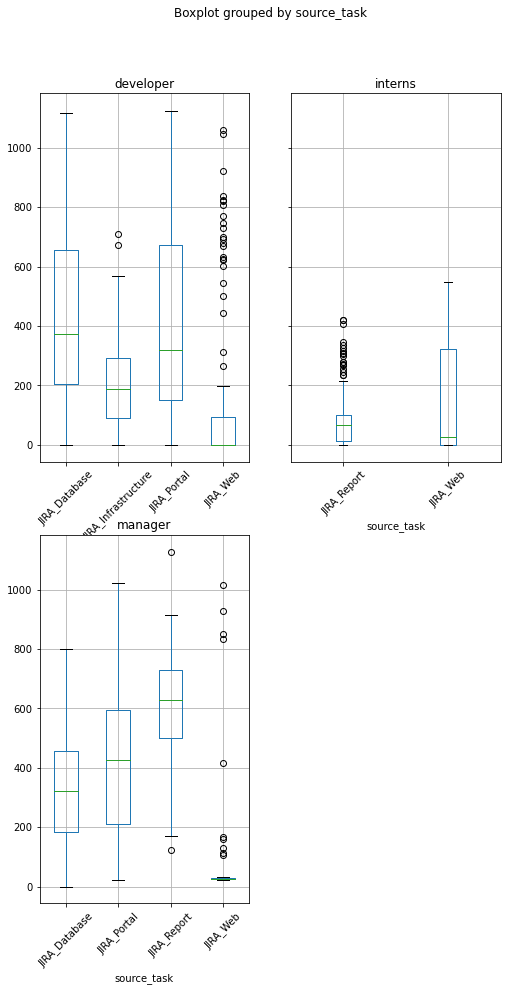

In [18]:
# Разброс простоя в очереди по проектам и исполнителям
df_fullJira.groupby("staff").boxplot(by="source_task",column="queue_time",grid=True, rot=45, fontsize=10,figsize=(8,15))

### Датасеты содержат данные о количестве оставшегося рабочего времени для незавершенных задач на конец моделирования

In [19]:
managerDFeop = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/manager_eop.xlsx")
developerDFeop = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/developer_eop.xlsx")

In [20]:
managerDFeop["source_task"] = managerDFeop["source_id"].map(labelsDict)
managerDFeop["staff"] = "manager"
developerDFeop["source_task"] = developerDFeop["source_id"].map(labelsDict)
developerDFeop["staff"] = "developer"

In [21]:
unitedEop = pd.concat([managerDFeop,developerDFeop], ignore_index = True)
unitedEop = unitedEop.drop(columns = ["source_id"])
unitedEop.groupby(["source_task"]).count()/nIterations

,eop_time,staff
source_task,,
JIRA_Database,2.04,2.04
JIRA_Infrastructure,2.65,2.65
JIRA_Portal,8.96,8.96
JIRA_Report,3.09,3.09
JIRA_Web,6.75,6.75


<AxesSubplot:ylabel='source_task'>

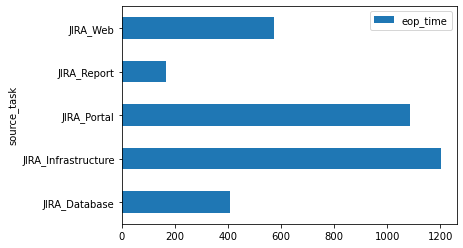

In [51]:
unEopMean = unitedEop.groupby("source_task").sum()/nIterations
unEopMean.plot(kind = "barh")

<AxesSubplot:ylabel='staff,source_task'>

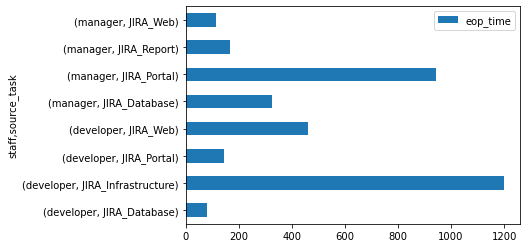

In [52]:
unEopMean = unitedEop.groupby(["staff","source_task"]).sum()/nIterations
unEopMean.plot(kind = "barh")

Insfrastructure по-умолчанию длительные проекты. Осталось много Web и Portal

### Датасет содержит количество незавершенных задач для каждой итерации

In [40]:
nis = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/nis.xlsx")

In [41]:
nis

,nis_count
0,21
1,26
2,26
3,23
4,27
...,...
95,33
96,26
97,22
98,23


На графике эксперимента заметен непрерывный рост числа задач. Система нестабильна

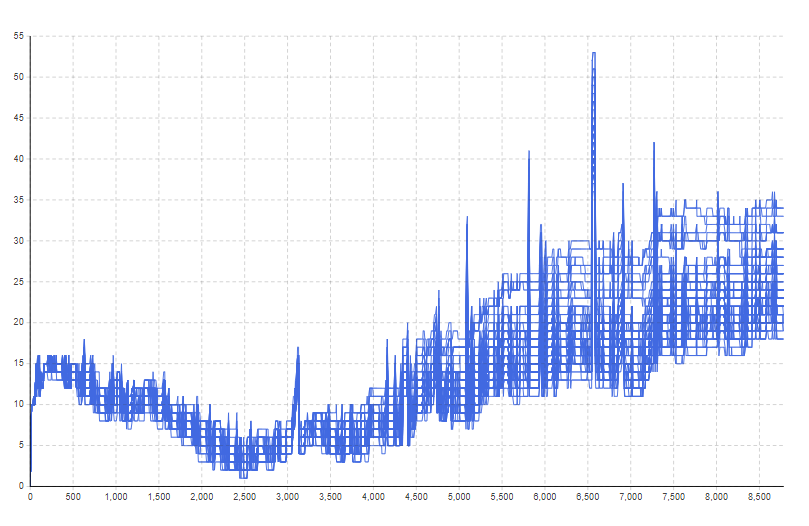

<AxesSubplot:ylabel='Frequency'>

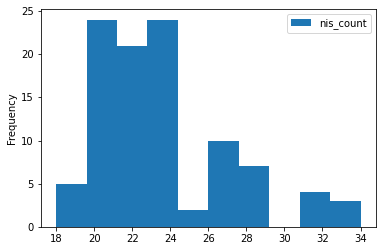

In [42]:
nis.plot(kind = "hist")

Возможность досрочного ухода стажеров искажает гистограмму, что делает процессы нестабильными к ожиданию задач

<AxesSubplot:>

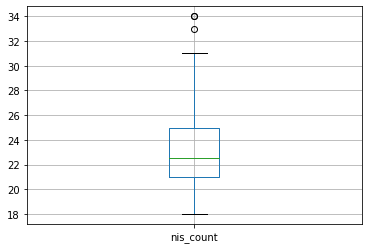

In [43]:
nis.boxplot()

In [44]:
print("Nis median = {0} ".format(nis["nis_count"].median() ))

Nis median = 22.5 


In [45]:
nis.describe()

,nis_count
count,100.000000
mean,23.490000
std,3.445081
min,18.000000
25%,21.000000
50%,22.500000
75%,25.000000
max,34.000000


### Датасет содержит время в очереди для незавершенных задач

In [31]:
queue_eop_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/queue_eop.xlsx")

In [32]:
queue_eop_df["task"]  = queue_eop_df.source_id.map(labelsDict)

In [33]:
queue_eop_df

,source_id,queue_eop_time,task
0,36,620.583333,JIRA_Infrastructure
1,35,352.016667,JIRA_Web
2,35,368.000000,JIRA_Web
3,35,208.000000,JIRA_Web
4,36,862.083333,JIRA_Infrastructure
...,...,...,...
2344,34,352.000000,JIRA_Report
2345,34,349.716667,JIRA_Report
2346,34,88.000000,JIRA_Report
2347,37,48.000000,JIRA_Portal


In [34]:
queue_eop_df.groupby("task").queue_eop_time.mean()

task
JIRA_Database          541.412990
JIRA_Infrastructure    732.961195
JIRA_Portal            599.538523
JIRA_Report            287.078479
JIRA_Web               404.411309
Name: queue_eop_time, dtype: float64

In [35]:
queue_eop_df.groupby("task").queue_eop_time.count()/nIterations

task
JIRA_Database          2.04
JIRA_Infrastructure    2.65
JIRA_Portal            8.96
JIRA_Report            3.09
JIRA_Web               6.75
Name: queue_eop_time, dtype: float64

Небольшие проекты по Report и Web простаивают огромное количество времени в связи с уходом стажеров.

### Резюме
Несмотря на то, что стажеры и завершают свои задачи быстро, все еще присутствует высокое время ожидания у других проектов. После окончания стажерской программы основной персонал вынужден выполнять работу с меньшими требованиями к квалификации.

Были выявлены проблемы перегруженности основного персонала, недостаточной занятости стажеров, нестабильности выполнения задач.